# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Generate data

Generate a small toy dataset from 3 multivariate Gaussians. Plot the data.

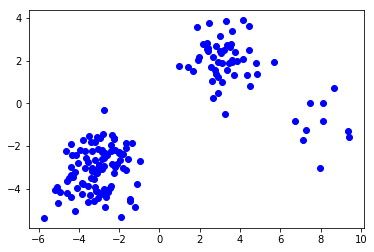

In [3]:
X = np.vstack((np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], 100),
               np.random.multivariate_normal([3, 2], [[1, 0], [0, 1]], 50),
               np.random.multivariate_normal([8, -1], [[1, 0], [0, 1]], 10)))

plt.figure()
plt.plot(X[:, 0], X[:, 1], 'o', color='blue')

We can clearly see the three clusters in the data. Let's call them: cluster 1, 2, and 3 for respectively the cluster with 100, 50, and 10 instances.

# Detect outliers

## Unsupervised SSDO

First, lets detect outliers using SSDO without providing any label information. We suspect about 10 percent of the data to be anomalous.

In [5]:
# import SSDO
from anomatools.anomaly_detection import SSDO

In [6]:
# construct detector and find outliers
detector = SSDO(n_clusters=3, contamination=0.1)
y_score, y_pred = detector.fit_predict(X, None)

Let us plot the results: red are the anomalies, and blue are the normals.

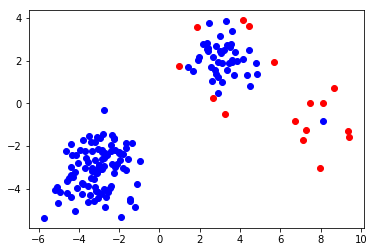

In [7]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)

## Semi-supervised SSDO with SSDO unsupervised prior

Now let us provide some labels: we, as user, know that cluster 3 is in fact normal, while cluster 2 is anomalous. We can give this information to SSDO. This time, there are actually more anomalies in the data because cluster 2 is larger than cluster 1.

In [8]:
y = np.zeros(X.shape[0], dtype=int)
y[-5:] = -1
y[-40:-35] = 1

In [9]:
# construct detector and find outliers
detector = SSDO(n_clusters=3, contamination=0.3)
y_score, y_pred = detector.fit_predict(X, y)

Again, we plot the results. Anomalies are red and normals are blue.

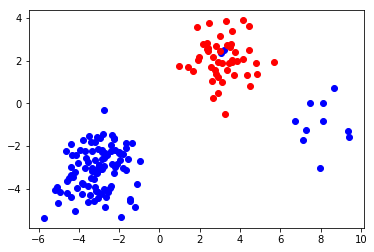

In [10]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)

## Semi-supervised SSDO with iForest unsupervised prior

Now we compute the prior using iForest

In [11]:
from anomatools.anomaly_detection import iForest
detector = iForest()
prior, _ = detector.fit_predict(X, None)

Now we use the prior from iForest in combination with the label information to compute the final anomaly scores.

In [12]:
from anomatools.anomaly_detection import SSDO

# construct detector and find outliers
detector = SSDO(contamination=0.3, base_classifier='precomputed')
y_score, y_pred = detector.fit_predict(X, y, prior=prior)

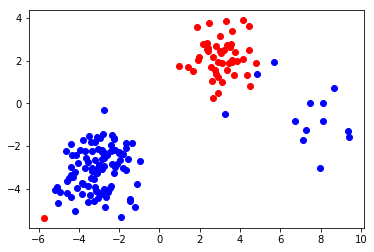

In [13]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)